In [55]:
# import Libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = "ignore")

In [56]:
# Load Data
df = pd.read_csv("breast_data.csv")

In [57]:
df.head(100)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0
...,...,...,...,...,...,...,...,...,...,...
95,49,29.777778,70,8.396,1.449709,51.3387,10.731740,20.76801,602.486,1
96,44,27.887617,99,9.208,2.248594,12.6757,5.478170,23.03306,407.206,1
97,40,27.636054,103,2.432,0.617890,14.3224,6.783870,26.01360,293.123,1
98,71,27.915519,104,18.200,4.668907,53.4997,1.656020,49.24184,256.001,1


In [58]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,0.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,0.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,0.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,1.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,1.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,1.000000


In [59]:
# check Null values 
df.isnull().sum() 

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [60]:
# Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
x = df.drop("Classification" , axis = 1)
y = df.Classification

In [62]:
scaler_x = scaler.fit_transform(x)

In [63]:
scaler

StandardScaler()

In [64]:
# train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaler_x, y, test_size=0.2, random_state=42)

# knn

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [66]:
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [67]:
knn.score(x_train , y_train)

0.8152173913043478

In [68]:
knn.score(x_test , y_test)

0.8333333333333334

In [69]:
y_pred = knn.predict(x_test)

In [70]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [71]:
print(confusion_matrix(y_test , y_pred))

[[11  1]
 [ 3  9]]


In [72]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.90      0.75      0.82        12

    accuracy                           0.83        24
   macro avg       0.84      0.83      0.83        24
weighted avg       0.84      0.83      0.83        24



# Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [74]:
lr.fit(x_train, y_train)

LogisticRegression()

In [75]:
y_pred1 = lr.predict(x_test)

In [76]:
print(confusion_matrix(y_test , y_pred1))

[[11  1]
 [ 2 10]]


In [77]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.91      0.83      0.87        12

    accuracy                           0.88        24
   macro avg       0.88      0.88      0.87        24
weighted avg       0.88      0.88      0.87        24



# Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [79]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [80]:
y_pred2 = rf.predict(x_test)

In [81]:
print(confusion_matrix(y_test , y_pred2))

[[10  2]
 [ 2 10]]


In [82]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.83      0.83      0.83        12

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24



# svc

In [83]:
from sklearn.svm import SVC
svm = SVC()

In [84]:
svm.fit(x_train, y_train)

SVC()

In [85]:
y_pred3 = svm.predict(x_test)

In [86]:
print(confusion_matrix(y_test , y_pred3))

[[11  1]
 [ 1 11]]


In [87]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.92      0.92      0.92        12

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24



# MLP Classifier

In [88]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

In [89]:
mlp.fit(x_train, y_train)

MLPClassifier()

In [90]:
y_pred4 = mlp.predict(x_test)

In [91]:
print(confusion_matrix(y_test , y_pred4))

[[12  0]
 [ 2 10]]


In [92]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.83      0.91        12

    accuracy                           0.92        24
   macro avg       0.93      0.92      0.92        24
weighted avg       0.93      0.92      0.92        24



# Decision tree 

In [93]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [94]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [95]:
y_pred5 = tree.predict(x_test)

In [96]:
print(confusion_matrix(y_test , y_pred5))

[[7 5]
 [5 7]]


In [97]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.58      0.58      0.58        12

    accuracy                           0.58        24
   macro avg       0.58      0.58      0.58        24
weighted avg       0.58      0.58      0.58        24



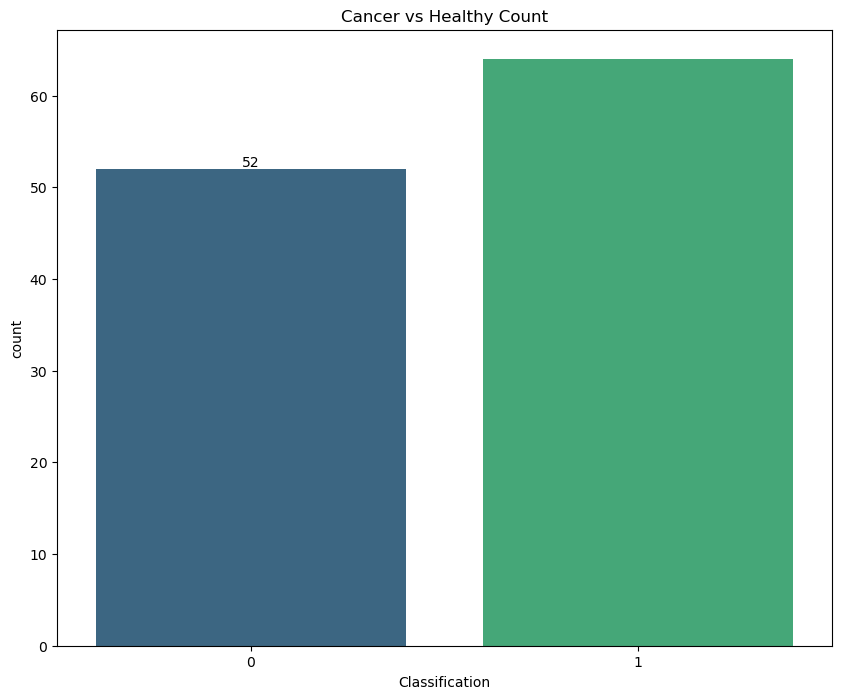

In [98]:
# Visualization 
plt.figure(figsize=(10,8))
ax = sns.countplot(x='Classification', data=df, palette='viridis')
ax.bar_label(ax.containers[0])   # ← ONE LINE LABELS
plt.title("Cancer vs Healthy Count")
plt.show()

---

In [99]:
corpus = {
    "What is the Breast Cancer Coimbra dataset?":
    "It is a medical dataset containing biochemical and clinical measurements from women to predict whether they have breast cancer.",

    "How many samples are in the dataset?":
    "The dataset contains 116 samples, each representing one woman.",

    "What type of problem does this dataset address?":
    "It is a binary classification problem where the goal is to predict cancer presence or absence.",

    "Where did this dataset originate?":
    "It comes from a medical research study performed in Coimbra, Portugal.",

    "Which features are included in the dataset?":
    "The dataset includes Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, and MCP.1.",

    "What does Age represent?":
    "Age represents the age of the woman in years.",

    "What does BMI represent?":
    "BMI stands for Body Mass Index and relates weight to height.",

    "What does Glucose represent?":
    "Glucose represents the blood sugar level of the patient.",

    "What does Insulin represent?":
    "Insulin indicates the amount of insulin hormone present in the blood.",

    "What is HOMA?":
    "HOMA stands for Homeostatic Model Assessment, used to estimate insulin resistance.",

    "What is Leptin?":
    "Leptin is a hormone related to fat storage and appetite regulation.",

    "What is Adiponectin?":
    "Adiponectin is a hormone with anti-inflammatory and metabolic functions.",

    "What is Resistin?":
    "Resistin is a hormone associated with inflammation and insulin resistance.",

    "Does this dataset need preprocessing?":
    "Yes. Preprocessing such as scaling, normalization, and target conversion is recommended.",

    "Why is feature scaling needed?":
    "The features have different ranges, so scaling improves model performance.",

    "Which scaler works best for this dataset?":
    "StandardScaler is most commonly used because it handles different units and ranges well.",

    "Which machine learning models work well on this dataset?":
    "Logistic Regression, SVM, Random Forest, KNN, Decision Tree, and Neural Networks all perform well.",

    "Which models require scaling?":
    "Logistic Regression, SVM, KNN, and Neural Networks require scaling.",

    "Which models do not require scaling?":
    "Random Forest and Decision Tree do not require scaling.",

    "What is the goal of the machine learning model?":
    "The goal is to predict whether a woman has breast cancer using her biochemical measurements.",
    
    "How do we evaluate models on this dataset?":
    "Models are evaluated using accuracy, precision, recall, F1 score, and confusion matrix.",

    "Why is recall important for this dataset?":
    "Recall is important because missing a breast cancer case is more harmful than a false positive.",

    "What are the limitations of this dataset?":
    "It is small and may not generalize well, so it should be used only for academic or research purposes.",

    "Can this dataset be used for real medical diagnosis?":
    "No. It is not suitable for clinical diagnosis and should only be used for educational or research purposes."
}

---

In [100]:
import joblib

In [101]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [102]:
joblib.dump(knn , "knn_model.pkl")

['knn_model.pkl']

In [103]:
joblib.dump(lr , "lr_model.pkl")

['lr_model.pkl']

In [104]:
joblib.dump(rf , "rf_model.pkl")

['rf_model.pkl']

In [105]:
joblib.dump(svm , "svm_model.pkl")

['svm_model.pkl']

In [106]:
joblib.dump(mlp, "mlp_model.pkl")

['mlp_model.pkl']

In [107]:
joblib.dump(tree , "tree_model.pkl")

['tree_model.pkl']

In [108]:
joblib.dump(corpus , "corpus.pkl")

['corpus.pkl']